In [46]:
include("../src/HPFEM.jl")

HPFEM

In [47]:
nel = 10
nnodes = nel + 1
idir = [1]#,nnodes]
M = 100
Q = M+2
bas = HPFEM.Basis1d(M,Q)
lmap = HPFEM.locmap(bas)
dof = HPFEM.DofMap1d(lmap, nnodes, idir);


In [48]:
fun(x) = airyai(x)

fun (generic function with 1 method)

In [49]:
a = -25
b = 15.0
nodes = collect(linspace(a, b, nnodes))

11-element Array{Float64,1}:
 -25.0
 -21.0
 -17.0
 -13.0
  -9.0
  -5.0
  -1.0
   3.0
   7.0
  11.0
  15.0

In [50]:
elems = [HPFEM.Element1d(e, nodes[e], nodes[e+1], bas) for e = 1:nel];

In [51]:
solver = HPFEM.CholeskySC(dof, HPFEM.BBSymTri);

In [52]:
for e = 1:nel
    Ae = HPFEM.mass_matrix(bas, elems[e])
    HPFEM.add_local_matrix(solver, e, Ae)
end


In [53]:
Fe = zeros(HPFEM.nmodes(lmap), nel)

for e = 1:nel
    fe = fun(elems[e].x)
    HPFEM.add_rhs!(bas, elems[e], fe, sub(Fe, :, e))
end

# Apply Dirichilet BCs:
Fe[1,1] = fun(a)
#Fe[2,2] = cos(b)
Fe


100x10 Array{Float64,2}:
  0.163527      0.0332303     0.0580859    …   2.48647e-7    1.15841e-12
 -0.0280055    -0.066778      0.0725187        2.43277e-8    9.12603e-14
 -0.00436763   -0.00159089   -0.000507684      2.00791e-8    7.8086e-14 
 -0.00412942    0.00424068   -0.0073788       -2.75292e-8   -1.14758e-13
 -0.0104873    -0.00839867    0.0162055        2.37517e-8    1.0932e-13 
 -0.0140066    -0.0138158    -0.000446388  …  -1.54568e-8   -8.06286e-14
  0.00337871   -0.0116266     0.0509802        8.08848e-9    4.89568e-14
 -0.0119664    -0.0437976     0.0209714       -3.51851e-9   -2.5259e-14 
  0.0413794     0.0280696    -0.0561988        1.29867e-9    1.12974e-14
  0.0272303     0.0439412    -0.0105161       -4.12287e-10  -4.44276e-15
 -0.0369904    -0.0172684     0.0215409    …   1.13599e-10   1.55268e-15
 -0.0137093    -0.0161907     0.00177091      -2.73094e-11  -4.86308e-16
  0.0143774     0.00548012   -0.00444534       5.73746e-12   1.37419e-16
  ⋮                       

In [54]:
HPFEM.solve!(solver, Fe)

100x10 Array{Float64,2}:
  0.163527      0.226358     -0.105262     …   7.49213e-7    4.22626e-12
  0.226358     -0.105262      0.17151          4.22626e-12   2.29492e-18
 -1.15591      -0.41361      -0.00283743      -1.83819e-6   -1.08043e-11
 -0.401481      0.454021     -0.637809         1.03182e-6    6.56383e-12
 -0.692728     -0.461711      0.777423        -5.40114e-7   -3.84659e-12
 -0.711978     -0.545923     -0.169829     …   2.46084e-7    2.02222e-12
  0.181518     -0.284932      1.30745         -9.68228e-8   -9.43949e-13
 -0.465109     -1.22927       0.472043         3.29771e-8    3.91789e-13
  1.14404       0.646607     -1.04267         -9.76065e-9   -1.4523e-13 
  0.665163      0.87818      -0.135337         2.51761e-9    4.83153e-14
 -0.809062     -0.331075      0.310784     …  -5.66103e-10  -1.44874e-14
 -0.247818     -0.249372      0.00896027       1.10579e-10   3.92114e-15
  0.258741      0.0883759    -0.0519506       -1.85778e-11  -9.50319e-16
  ⋮                       

In [55]:
nξ = 101
ξ = collect(linspace(-1,1,nξ));
ϕ = zeros(nξ, M)
for i = 1:M
    ϕ[:,i] = bas(ξ, i)
end

Ue = ϕ * Fe;



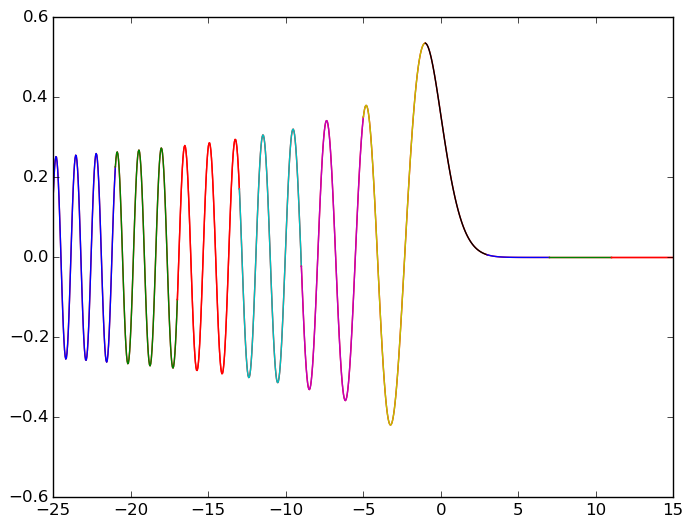

7.046585537295869e-13

In [56]:
using PyPlot
x = [(1-ξ)*el.a/2 + (1+ξ)*el.b/2 for el in elems]
maxerr = 0.0
for e = 1:nel
    uu = fun(x[e])
    err = maxabs(uu-Ue[:,e])
    if err > maxerr maxerr = err end    
    plot(x[e], Ue[:,e], "r")
    plot(x[e], uu)
end
maxerr